In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_parquet('rail_data_cleaned_20230728132300.parquet')

In [3]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,pass,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,None,5,None,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,None,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,None,B,None,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,None,A,None,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,None,1,8,NaT,NaT,False,False


In [ ]:
# Analyzing Train Length to see if there is a correlation between the length of train and its arrival/departure time.

In [47]:
df.train_length.unique()

array([None, '8', '2', '5', '10', '6', '4', '12', '3', '7', '11', '9'],
      dtype=object)

In [48]:
delayed_arrivals = df[df['is_delayed_arrival'] == True]['train_length'].value_counts().sort_values(ascending=True)

In [69]:
print(delayed_arrivals)

10     12
3      31
12     46
6      53
5      57
4      90
8     284
Name: train_length, dtype: int64


In [70]:
delayed_departures = df[df['is_delayed_departure'] == True]['train_length'].value_counts().sort_values(ascending=True)

In [71]:
delayed_departures

10     13
3      38
12     50
6      56
5      59
4      99
8     325
Name: train_length, dtype: int64

In [90]:
delayed_count_df = pd.DataFrame({'Delayed Arrivals': delayed_arrivals, 'Delayed Departures': delayed_departures})

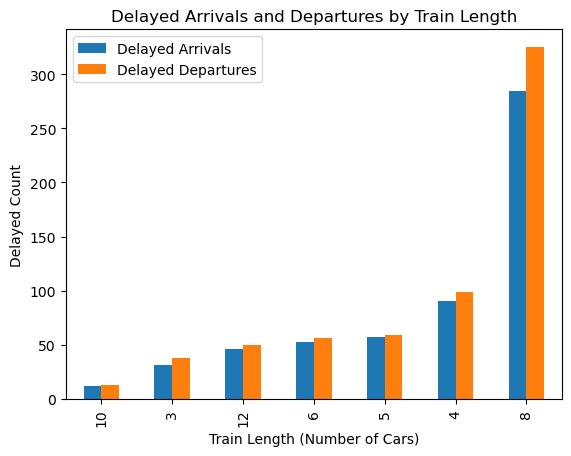

In [91]:
delayed_count_df.plot(kind='bar')
plt.xlabel('Train Length (Number of Cars)')
plt.ylabel('Delayed Count')
plt.title('Delayed Arrivals and Departures by Train Length')
plt.show()

In [ ]:
non_delayed_arrivals = df[df['is_delayed_arrival'] == False]['train_length'].value_counts().sort_values(ascending=True)

In [ ]:
non_delayed_departures = df[df['is_delayed_departure'] == False]['train_length'].value_counts().sort_values(ascending=True)

In [ ]:
non_delayed_count_df = pd.DataFrame({'Delayed Arrivals': non_delayed_arrivals, 'Delayed Departures': non_delayed_departures})

In [ ]:
non_delayed_count_df.plot(kind='bar')
plt.xlabel('Train Length (Number of Cars)')
plt.ylabel('Count')
plt.title('Non Delayed Arrivals and Departures by Train Length')
plt.show()

In [108]:
# count_df=count_df.sort_index()

In [115]:
count_df = pd.DataFrame({'Delayed Arrivals': delayed_arrivals, 'Delayed Departures': delayed_departures, 'Non Delayed Arrivals': non_delayed_arrivals, 'Non Delayed Departures': non_delayed_departures})

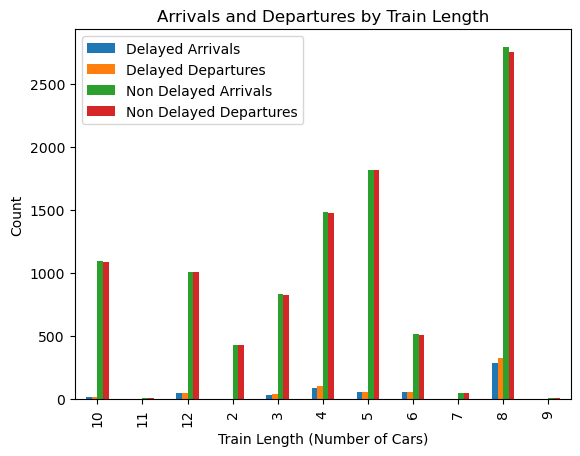

In [116]:
count_df.plot(kind='bar')
plt.xlabel('Train Length (Number of Cars)')
plt.ylabel('Count')
plt.title('Arrivals and Departures by Train Length')
plt.show()